<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Подготовка-окружения" data-toc-modified-id="Подготовка-окружения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка окружения</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Предварительная-обработка" data-toc-modified-id="Предварительная-обработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предварительная обработка</a></span><ul class="toc-item"><li><span><a href="#Обучающие-данные" data-toc-modified-id="Обучающие-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучающие данные</a></span></li><li><span><a href="#Тестовые-данные" data-toc-modified-id="Тестовые-данные-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тестовые данные</a></span></li></ul></li><li><span><a href="#Корелляционный-анализ" data-toc-modified-id="Корелляционный-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Корелляционный анализ</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li></ul></div>

ФИО: Макейкин Олег Алексеевич

https://github.com/OlMac48

MakeykinOleg@yandex.ru

olegmakeykin@gmail.com

<h1>Startups operations/close predictions [M1_40DS+] Makeykin Oleg<span class="tocSkip"></span></h1>
Разработка модели машинного обучения для предсказания судьбы стартапов

**Цель проекта:** 
1. Разработать модель машинного обучения для предсказания продолжения деятельности стартапа. 
2. Провести полноценный разведочный анализ и сформировать рекомендации будущим создателям стартапов (какие факторы влияют на успешность стартапа).

Для анализа предоставлены данные по стартапам за период с 1970 по 2018 годы. Необходимо предсказать какие стартапы закроются.
Данные уже разделены на две выборки: тренировочную и тестовую. Целевым признаком в тренировочной выборке является status - он может принимать значения operating или closed.
Исходные данные:
Датасет состоит из двух файлов (+пример с выгрузкой): тренировочный набор (около 53к записей) и тестовый набор (около 13к записей). Тренировочный набор содержит целевой признак status, указывающий на то, закрылся стартап или продолжает действовать. Временной период - '1970-01-01' по '2018-01-01'. Дата формирования выгрузки - '2018-01-01'

kaggle_startups_train.csv - информация (53 000) стартапах, которые будут использоваться в качестве обучающих данных.

kaggle_startups_test.csv - информация (13 000) стартапах, которые будут использоваться в качестве тестовых данных. 
Целевым признаком является значение 'status' для каждого стартапа из этого датасета.

kaggle_startups_sample_submit.csv - файл с примером предсказаний в правильном формате.
name - идентификатор (название) стартапа в тестовом наборе.
status - целевой признак. Для каждого стартапа предскажите категориальное значение соответствующее прогнозу ['operating', 'closed'].


В качестве метрики необходимо использовать f1-score.

**Описание полей данных**

 - `name` - Название стартапа
 - `category_list` - Список категорий, к которым относится стартап
 - `funding_total_usd` - Общая сумма финансирования в USD
 - `status` - Статус стартапа (закрыт или действующий)
 - `country_code` - Код страны
 - `state_code` - Код штата
 - `region` - Регион
 - `city` - Город
 - `funding_round` - Количество раундов финансирования
 - `founded_at` - Дата основания
 - `first_funding_at` - Дата первого раунда финансирования
 - `last_funding_at` - Дата последнего раунда финансирования
 - `closed_at` - Дата закрытия стартапа (если применимо)
 - `lifetime` - Время существования стартапа в днях
 
**План работы**

1. Загрузка и ознакомление с данными;
2. Предварительная обработка;
3. Корреляционный анализ;
4. Исследовательский анализ данных;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков;
10. Подготовка отчета по исследованию.

 
 pandas - для работы с данными и математических операций.
matplotlib и seaborn - для визуализации данных.
scikit-learn - для предобработки данных, разделения на тренировочные и тестовые наборы, построения и оценки моделей машинного обучения.
catboost или lightgbm - для работы с продвинутыми моделями градиентного бустинга.
shap - для анализа важности признаков модели
phik - для оценки признаков на мультиколлинеарность

## Загрузка и ознакомление с данными

### Подготовка окружения

In [106]:
# установим, обновим библиотеки
!pip install missingno -q
!pip install phik -q
!pip install shap -q
!pip install --upgrade scikit-learn -q

In [105]:
!pip install pycountry-convert

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
    --------------------------------------- 0.1/6.3 MB 2.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.3 MB 3.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/6.3 MB 5.0 MB/s eta 0:00:02
   -------- ------------------------------- 1.4/6.3 MB 7.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.1/6.3 MB 13.3 MB/s eta 0:00:01
   ------------------------------------ --- 5.9/6.3 MB 20.7 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/342.3 kB ? eta -:--:--
   --------------------------------------- 342.3/342.3 kB 22.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/210.2 kB ? eta -:--:--
   --------------------------------------- 210.2/210.2 kB 13.3 MB/s eta 0:00:00


In [107]:
#загрузка библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as st
import phik
import shap
import missingno as msno
#import sweetviz as sv
import pycountry_convert as pc

In [3]:
# загружаем модели машинного обучения

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [4]:
# загружаем метрики

from sklearn.metrics import f1_score

# загружаем классы для работы с данными

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                    RandomizedSearchCV)
from sklearn.preprocessing import (OneHotEncoder, 
                                   LabelEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler,
                                   RobustScaler)

In [5]:
# задаем константы

RANDOM_STATE = 42
TEST_SIZE = 0.25

### Загрузка данных

In [59]:
#для вывода информации о наборах данных создадим функцию - первые стоки датасета, основная информация, диаграмма пропусков
def firstdf(data_s, name_s, numb):
    if numb == 1:
        display(f"Таблица {name_s}:", data_s.head())
        display(f'Информация о таблице {name_s}: ')
        display(data_s.info())
        display(f'Дубликатов в таблице {name_s} ', data_s.duplicated().sum())
    elif numb == 2:   
        display(f'Таблица {name_s}:', data_s.head())
        display(f'Информация о таблице {name_s}: ')
        display(data_s.info())
        display(f'Дубликатов в таблице  {name_s} ', data_s.duplicated().sum())

        fig, ax = plt.gcf(), plt.gca()
        msno.bar(data_s, color="dodgerblue", sort="ascending", fontsize=10, figsize=(5,3));
        
        ax.tick_params(labelsize=10)
        ax.set_xlabel("колонки", fontsize=12)
        ax.set_title(f'Диаграмма пропусков в таблице \n {name_s}:', fontsize=12)
        ax.set_ylabel("процент и абсолютное количество\n заполненных значений ", fontsize=10)

        plt.show()
    elif numb == 3:   
        display(f'Перечень колонок таблицы \n{name_s}: ')
        for col in data_s.columns:
            print(col)
    elif numb == 4:   
        data_s.columns = data_s.columns.str.lower()
        display(data_s.info())
    elif numb == 5:
        fig, ax = plt.gcf(), plt.gca()
        msno.bar(data_s, color="dodgerblue", fontsize=10, figsize=(10,5));
        
        ax.tick_params(labelsize=10)
        ax.set_xlabel("колонки", fontsize=10)
        ax.set_title(f'Диаграмма пропусков в таблице \n {name_s}:', fontsize=12)
        ax.set_ylabel("процент и абсолютное количество\n заполненных значений ", fontsize=10)
    else :
        display('Неверный параметр', numb)        

'Таблица Информация о стартапах, обучающие данные:'

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaT
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT


'Информация о таблице Информация о стартапах, обучающие данные: '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

None

'Дубликатов в таблице  Информация о стартапах, обучающие данные '

0

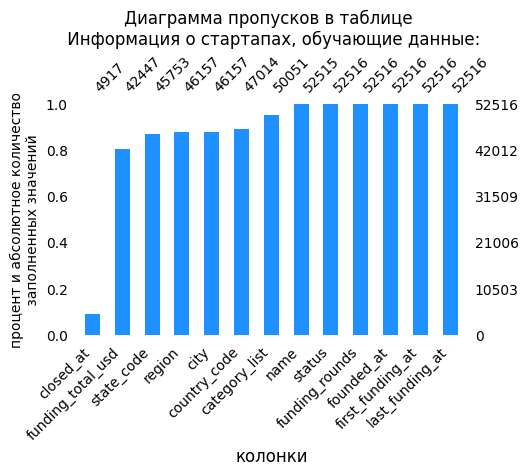

In [7]:
# загрузка тренировочных данных, с обработкой дат 

try:
    df_train = pd.read_csv(
        "C:\\Users\Makeikin-o\\master-Olmakey\\kaggle_startups_train_28062024.csv", 
        parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at'])
except:
    df_train = pd.read_csv(
        'https://github.com/OlMac48/master-Olmakey/blob/master/kaggle_startups_train_28062024.csv', 
        parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at'])

firstdf(df_train, 'Информация о стартапах, обучающие данные', 2)

В ряде колонок наблюдаются пропуски, например код штата, страна, регион, город - до 10% пропущенных значений. В колонке список категорий к которым относится стартап также наблюдается значительное количество пропусков.

'Таблица Информация о стартапах, тестовые данные:'

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


'Информация о таблице Информация о стартапах, тестовые данные: '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


None

'Дубликатов в таблице  Информация о стартапах, тестовые данные '

0

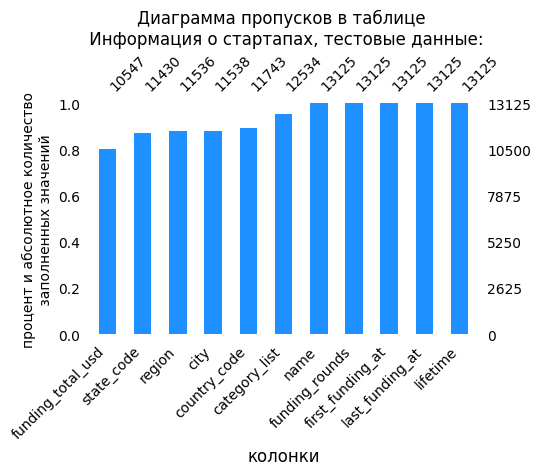

In [8]:
try:
    df_test = pd.read_csv(
        'C:\\Users\\Makeikin-o\\master-Olmakey\\kaggle_startups_test_28062024.csv', 
        parse_dates=['first_funding_at', 'last_funding_at'])
except:
    df_test = pd.read_csv(
        'https://github.com/OlMac48/master-Olmakey/blob/master/kaggle_startups_test_28062024.csv', 
        parse_dates=['first_funding_at', 'last_funding_at'])

firstdf(df_test, 'Информация о стартапах, тестовые данные', 2)


В тестовых данных нет колонок - founded_at, closed_at, status- информации о времени открытия стартапа, времени закрытия стартапа, и статусе стартапа. В обучающих данных нет колонки - lifetime - время жизни стартапа.

**Итог:** Обучающие и тестовые данные загружены. Даты преобразованы в единый формат.

## Предварительная обработка

### Обучающие данные

Выявлено значительное количество пропусков, оценим существуют ли зависимости между ними.

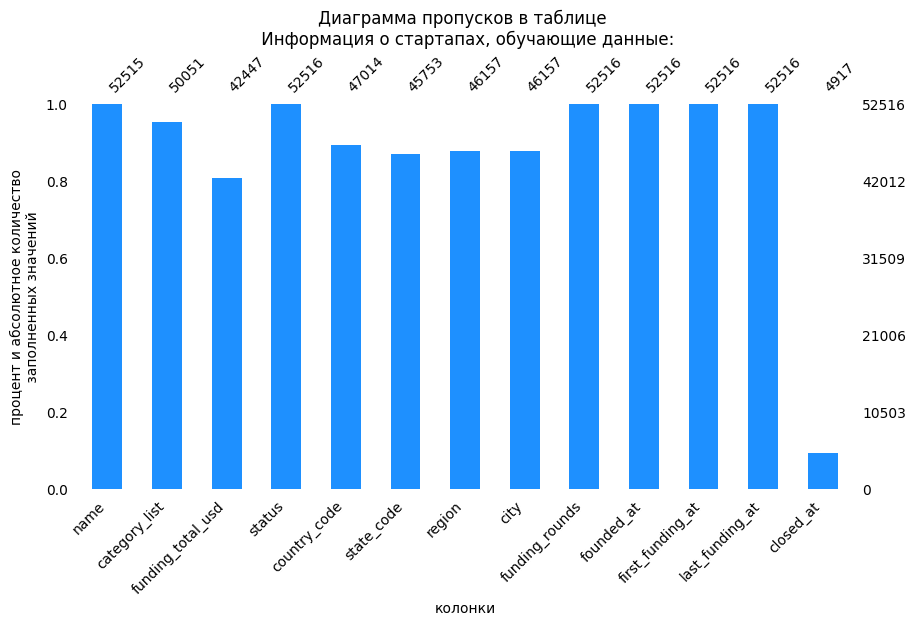

In [9]:
firstdf(df_train, 'Информация о стартапах, обучающие данные', 5)

<AxesSubplot:>

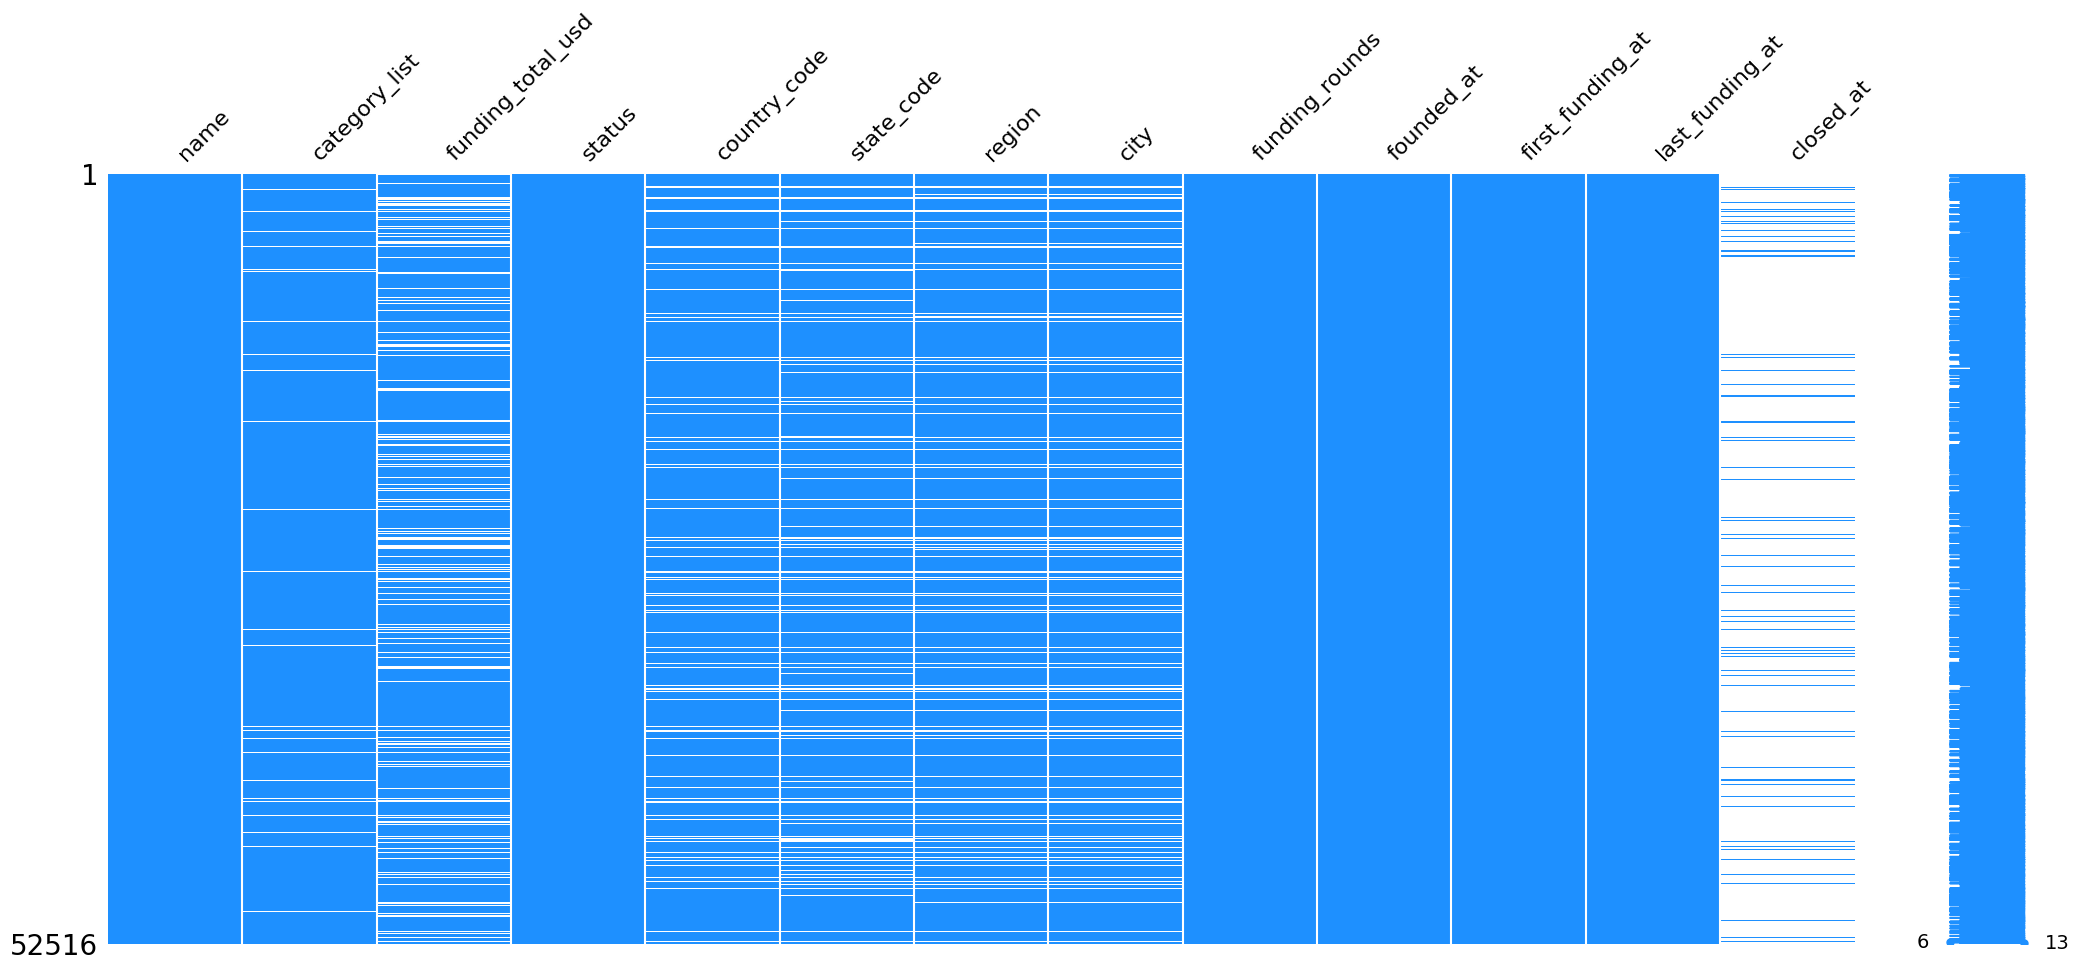

In [60]:
msno.matrix(df_train, color = (0.11765, 0.56471, 1.0))

<AxesSubplot:>

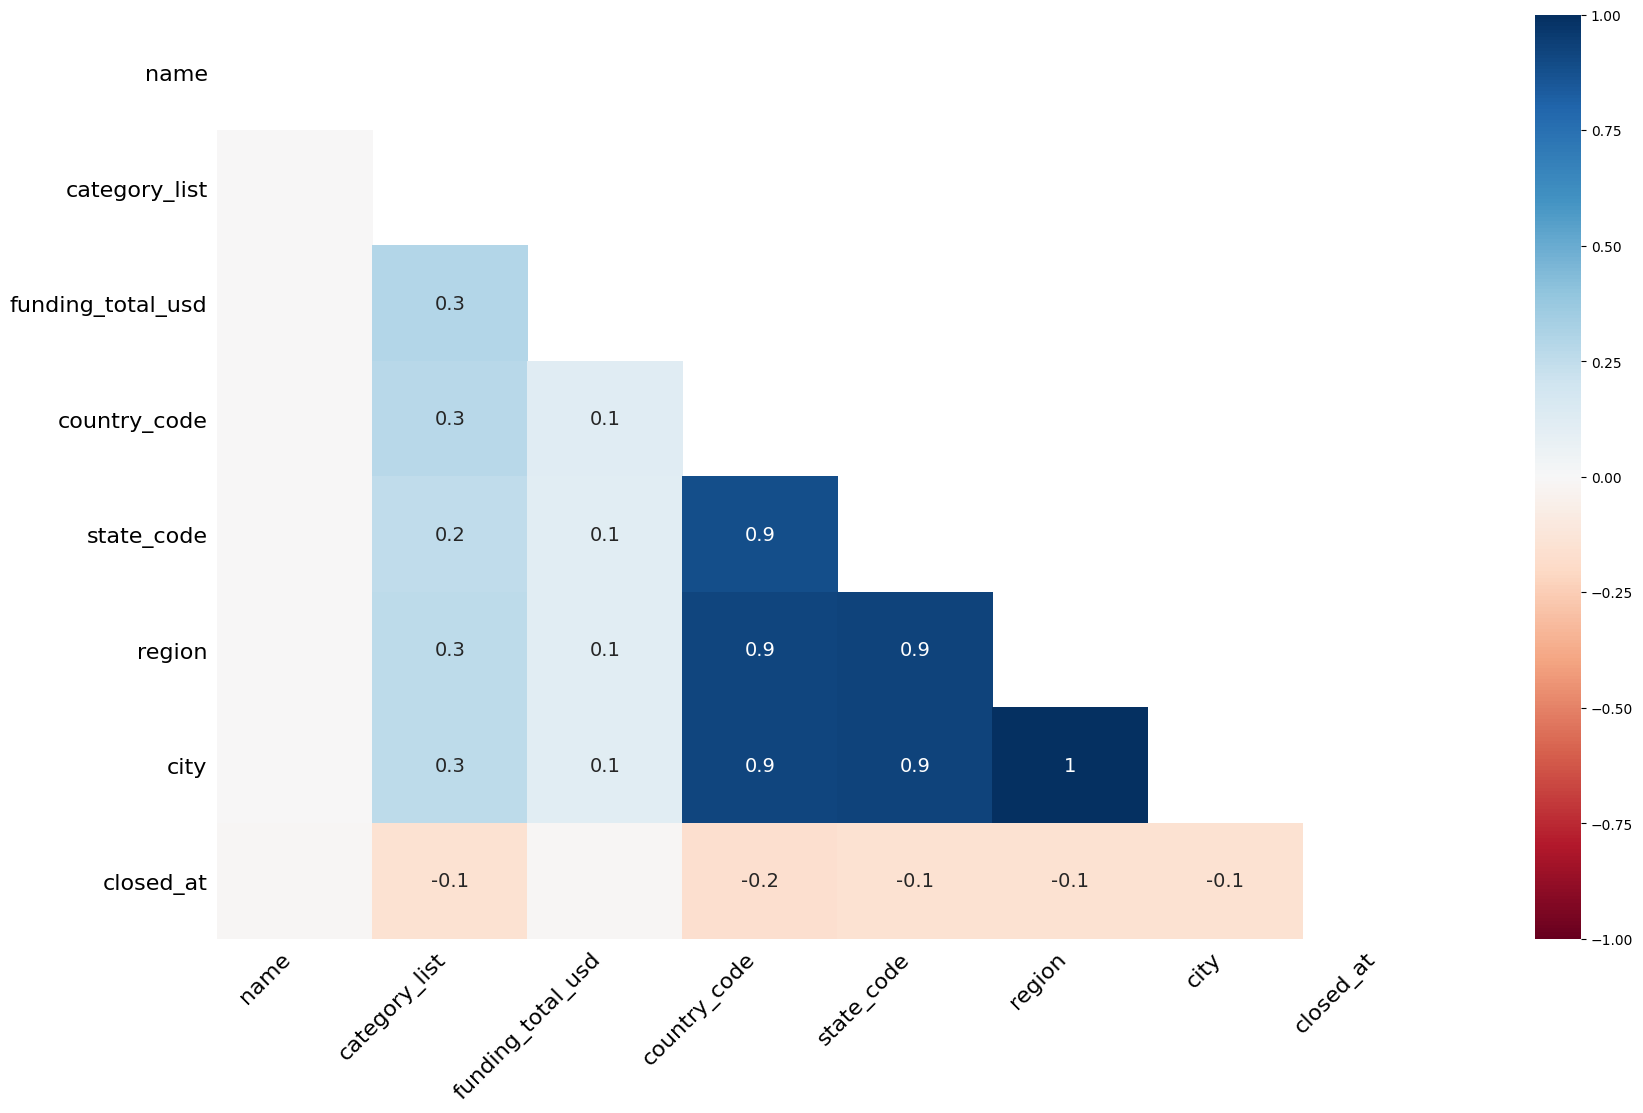

In [11]:
#зависят ли пропуски от значений других столбцов?
msno.heatmap(df_train)

Обнаружена зависимость пропусков в столбцах city, region, country_code, state_code. Заменим пропуски на unkn.
Пропуски в колонке funding_total_usd - заменим на ноль, предположим что стартап не набрал денег.
Bзбавимся от строки с пропуском названия и заменим отсутствующие категории на unkn.

 В колонке closed_at отсутствующие поля объяснимы - стартапы еще не закончились. Мы рассматриваем данные за временной период по 2018-01-01, поэтому можно заменить дату закрытия стартапа для незакончившихся проектов на 2018-01-01.

In [12]:
df_train_new = df_train.reset_index(drop=True)

In [13]:
#
col = ['country_code', 'state_code', 'region', 'city', 'category_list']
display(df_train_new.head())   
for col_name in col:
        df_train_new[[col_name]] = df_train_new[[col_name]].fillna(value='unkn') 

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaT
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT


In [14]:
#df_train_new[['country_code', 'state_code', 'region', 'city']] = \
#             df_train_new[['country_code', 'state_code', 'region', 'city']].fillna(value='unkn')
df_train_new['funding_total_usd'] = df_train_new['funding_total_usd'].fillna(0)
#df_train_new.info()

In [15]:
#избавимся от строки с пропуском названия и заменим отсутствующие категории на unkn
df_train_new = df_train_new.dropna(subset=['name'])
#df_train_new['category_list'] = df_train_new['category_list'].fillna(value='unkn')
#df_train_new.info()

In [16]:
df_train_new['closed_at'] = df_train_new['closed_at'].fillna(value='2018-01-01')
df_train_new['closed_at'] = pd.to_datetime(df_train_new['closed_at'], format= '%Y-%m-%d')
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52515 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      52515 non-null  object        
 2   funding_total_usd  52515 non-null  float64       
 3   status             52515 non-null  object        
 4   country_code       52515 non-null  object        
 5   state_code         52515 non-null  object        
 6   region             52515 non-null  object        
 7   city               52515 non-null  object        
 8   funding_rounds     52515 non-null  int64         
 9   founded_at         52515 non-null  datetime64[ns]
 10  first_funding_at   52515 non-null  datetime64[ns]
 11  last_funding_at    52515 non-null  datetime64[ns]
 12  closed_at          52515 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [17]:
df_train_new

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01
3,Sancilio and Company,Health Care,22250000.0,operating,unkn,unkn,unkn,unkn,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01
4,WireTough Cylinders,Manufacturing,0.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,0.0,operating,CAN,ON,Toronto,Kitchener,1,2012-01-01,2014-03-01,2014-03-01,2018-01-01
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2013-08-25,2014-03-07,2014-03-07,2018-01-01
52513,Taskforce,Email|Messaging|Productivity Software,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2010-07-01,2009-06-14,2011-01-01,2018-01-01
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1997-12-01,1998-11-30,2004-03-01,2018-01-01


In [18]:
#добавим время жизни проекта в днях в обучающие данные. назовем аналогично тестовой выборке
df_train_new['lifetime'] = (( df_train_new['closed_at'] - df_train_new['founded_at'] ) / np.timedelta64 ( 1 , 'D')).astype('int')
df_train_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52515 entries, 0 to 52515
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      52515 non-null  object        
 2   funding_total_usd  52515 non-null  float64       
 3   status             52515 non-null  object        
 4   country_code       52515 non-null  object        
 5   state_code         52515 non-null  object        
 6   region             52515 non-null  object        
 7   city               52515 non-null  object        
 8   funding_rounds     52515 non-null  int64         
 9   founded_at         52515 non-null  datetime64[ns]
 10  first_funding_at   52515 non-null  datetime64[ns]
 11  last_funding_at    52515 non-null  datetime64[ns]
 12  closed_at          52515 non-null  datetime64[ns]
 13  lifetime           52515 non-null  int32         
dtypes: dat

In [19]:
df_train_new

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,2998
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,4748
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,4383
3,Sancilio and Company,Health Care,22250000.0,operating,unkn,unkn,unkn,unkn,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,5114
4,WireTough Cylinders,Manufacturing,0.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,2791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,0.0,operating,CAN,ON,Toronto,Kitchener,1,2012-01-01,2014-03-01,2014-03-01,2018-01-01,2192
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2013-08-25,2014-03-07,2014-03-07,2018-01-01,1590
52513,Taskforce,Email|Messaging|Productivity Software,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2010-07-01,2009-06-14,2011-01-01,2018-01-01,2741
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1997-12-01,1998-11-30,2004-03-01,2018-01-01,7336


Как мы установили ранее явных дубликатов не обнаружено

In [20]:
df_train_new.duplicated(keep=False).sum()

0

In [21]:
df_train_new[df_train_new.duplicated(keep=False)]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime


In [22]:
#для вывода уникальных значений столбцов создадим функцию
#параметры - дата фрейм, список столбцов, параметр задающий набор функционала 
def nextdf(data_s, name_s, col_s, numb):
    print(f'Уникальные значения в колонках таблицы \033[1m {name_s} \033[0m ')
    if numb == 1:
        for names in col_s:
            print(f'\033[1m {names} \033[0m \n Уникальных значений: ', data_s[names].nunique()) 
            data_s[names].value_counts()
            print(data_s[names].value_counts(),'\n')
    else :
        display('Неверный параметр', numb)    

In [23]:
nextdf(df_train_new, "Информация о стартапах, обучающие данные:", df_train_new.columns, 1)

Уникальные значения в колонках таблицы  Информация о стартапах, обучающие данные:  
 name  
 Уникальных значений:  52515
Agribotix                1
Alo7                     1
Cambridge Consultants    1
Socialthing              1
Discourse                1
                        ..
Retidoc                  1
L'Idealist               1
LawBite                  1
VBI Vaccines             1
Webinar.ru               1
Name: name, Length: 52515, dtype: int64 

 category_list  
 Уникальных значений:  22106
Software                                             3207
Biotechnology                                        2905
unkn                                                 2465
E-Commerce                                           1064
Mobile                                                920
                                                     ... 
Banking|Financial Services|FinTech|Technology           1
Developer APIs|Mobile                                   1
Communications Hardware|Mobile

Данные показывают что с начала рассматриваемого периода стартапов было больше, убедимсся в этом, заодно добавим столбец год основания стартапа.

In [24]:
df_train_new['year_founded'] = pd.DatetimeIndex(df_train_new['founded_at']).year
nextdf(df_train_new, "Информация о стартапах, обучающие данные:", ['year_founded'], 1)

Уникальные значения в колонках таблицы  Информация о стартапах, обучающие данные:  
 year_founded  
 Уникальных значений:  47
2013    6954
2012    6704
2011    5687
2014    4900
2010    4455
2009    3592
2008    2829
2007    2665
2006    2192
2005    1727
2004    1389
2015    1298
2003    1128
2000    1076
2002    1045
2001     961
1999     954
1998     598
1997     388
1996     332
1995     216
1994     162
1993     147
1992     129
1991      96
1989      96
1990      95
1988      78
1985      76
1984      72
1987      69
1986      57
1983      54
1981      46
1979      39
1982      37
1980      34
1978      26
1976      20
1977      18
1972      17
1975      16
1973      13
1971      13
1974      11
1970       2
2016       2
Name: year_founded, dtype: int64 



### Тестовые данные

Выполним над тестовыми данными аналогичные процедуры, проверим пропуски, выявим зависимости, скопируем датафрейм, установим заглушки.

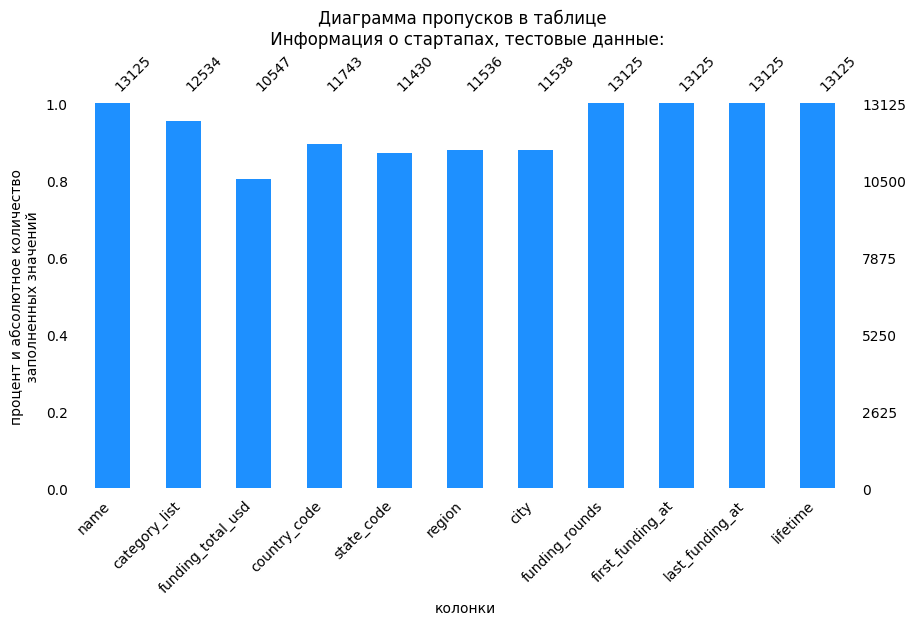

In [25]:
firstdf(df_test, 'Информация о стартапах, тестовые данные', 5)

<AxesSubplot:>

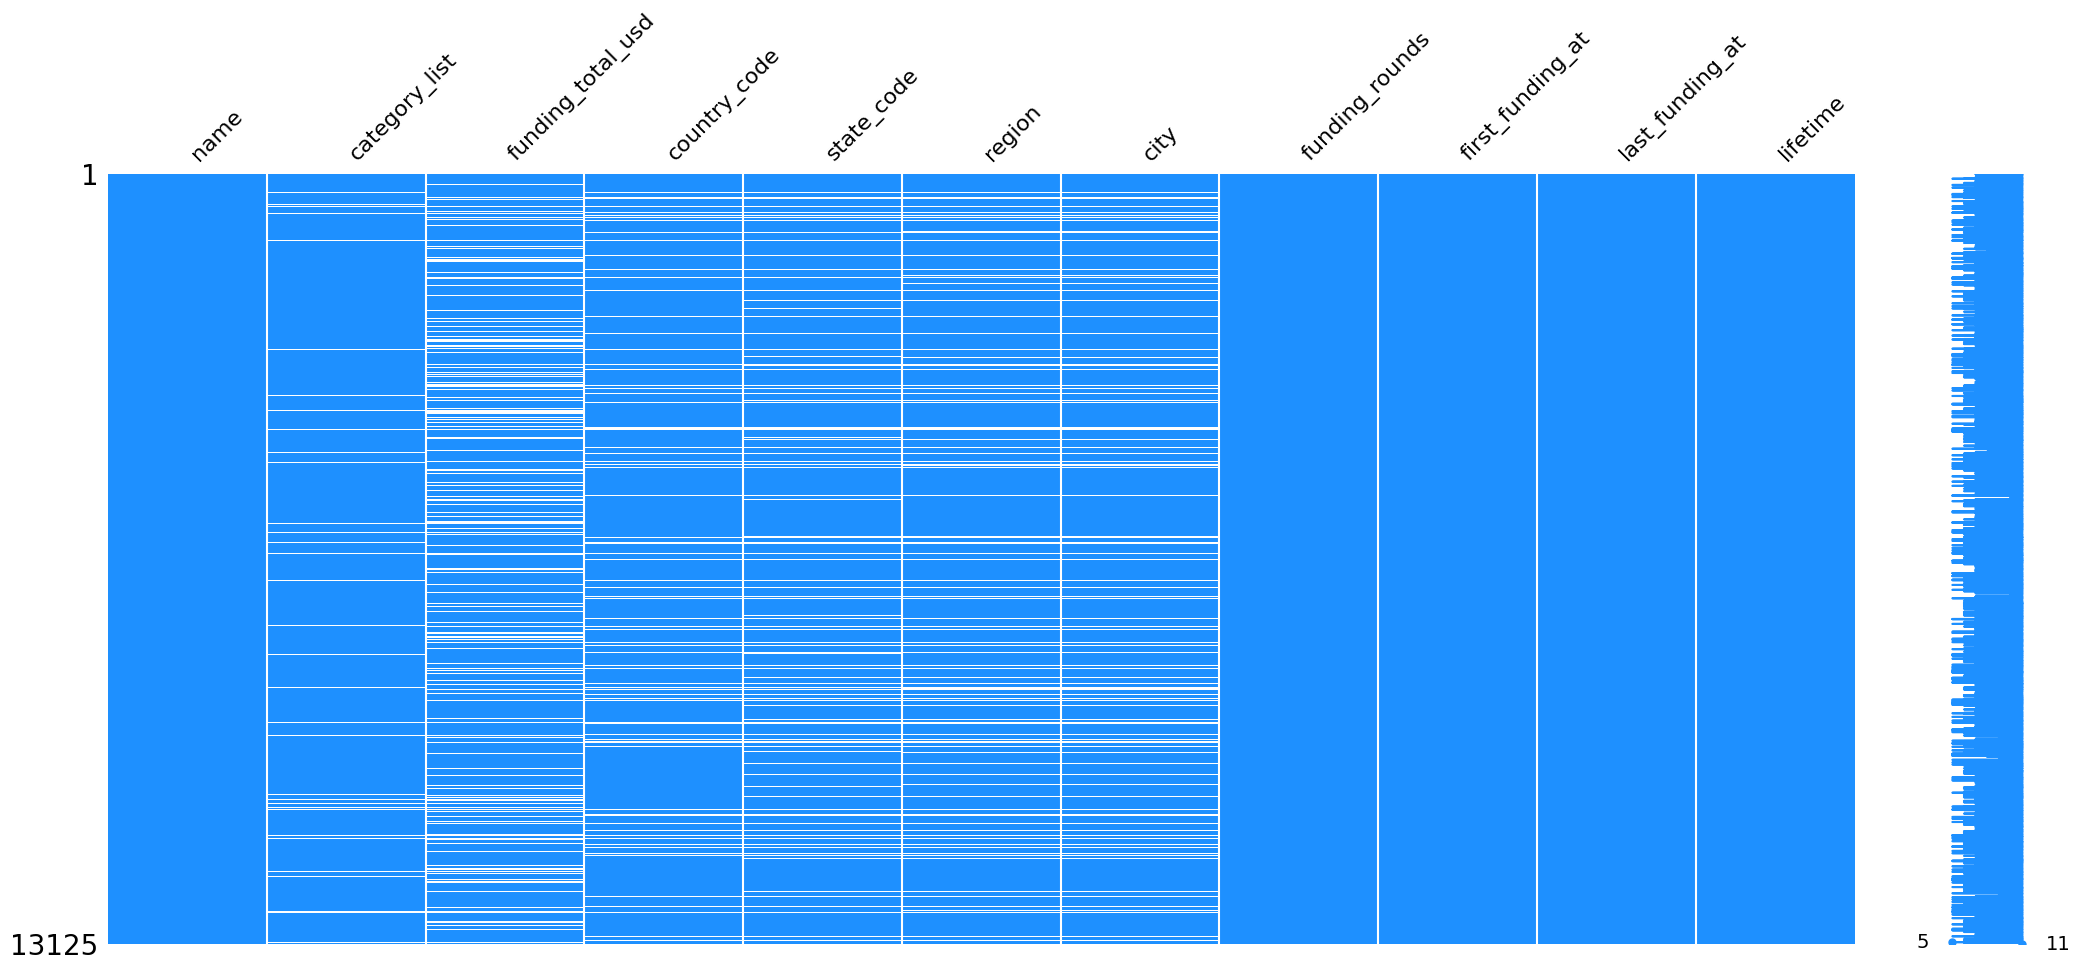

In [26]:
msno.matrix(df_test, color = (0.11765, 0.56471, 1.0))

<AxesSubplot:>

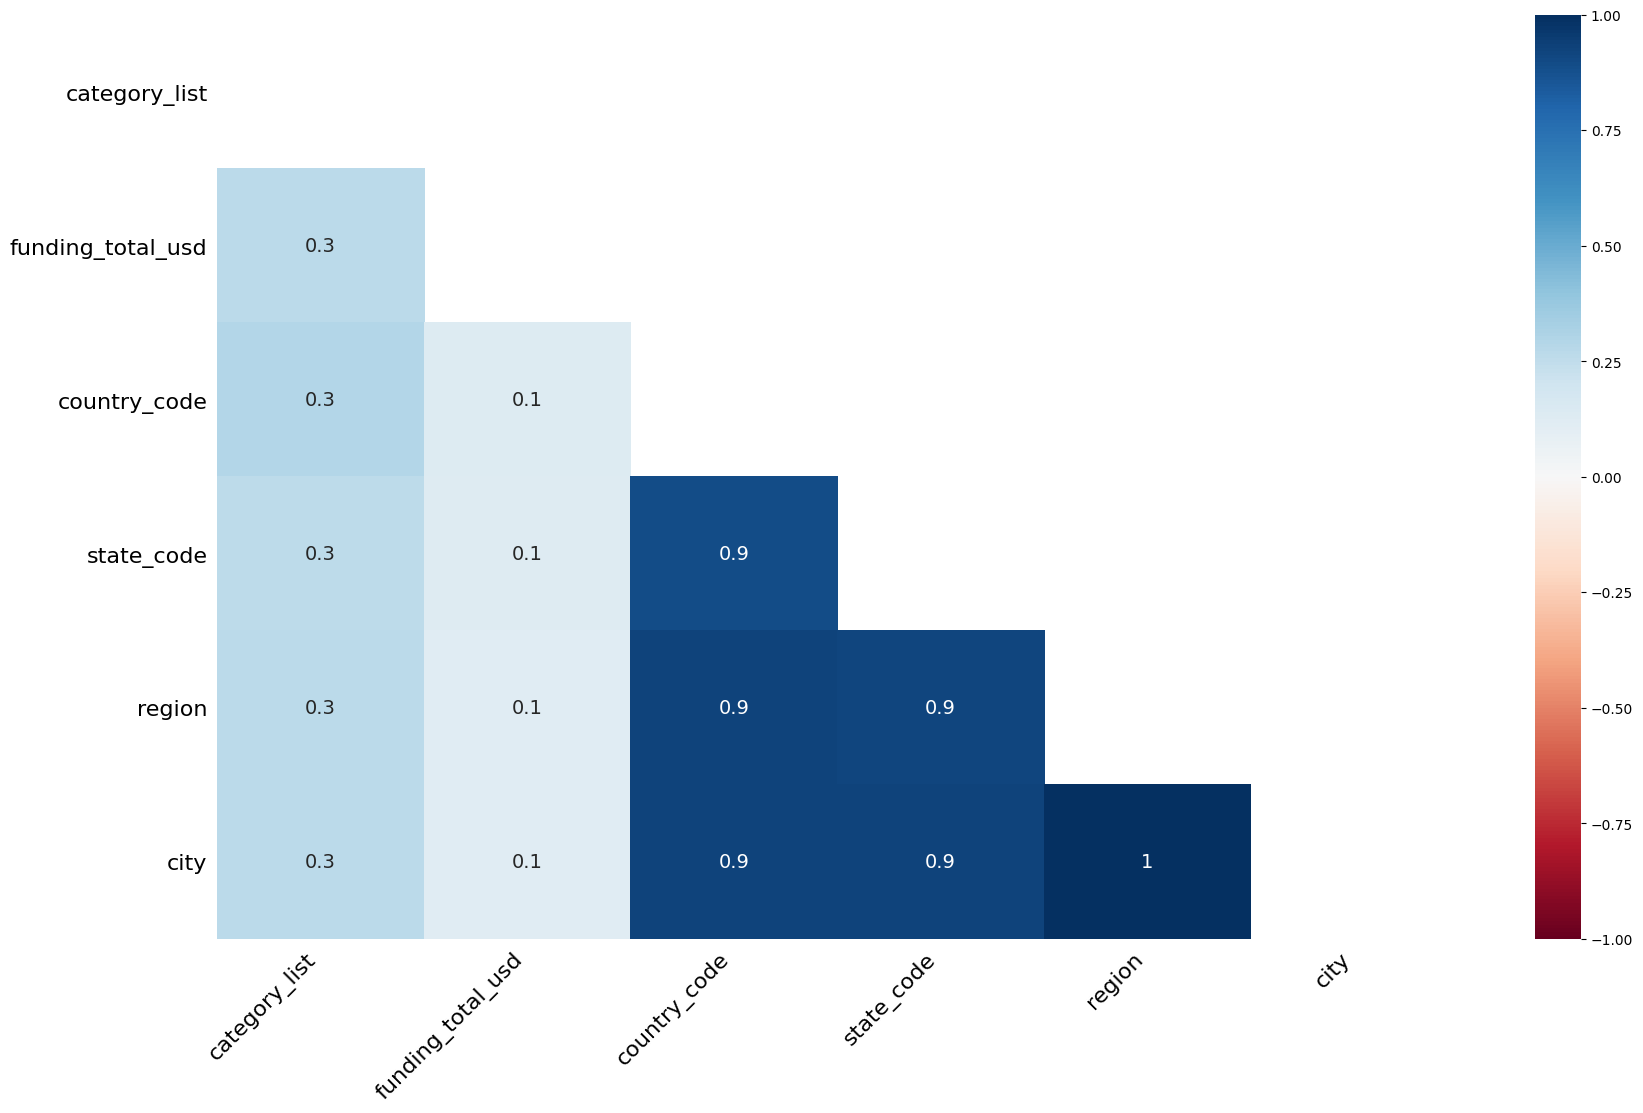

In [27]:
#зависят ли пропуски от значений других столбцов?
msno.heatmap(df_test)

In [28]:
df_test_new = df_test.reset_index(drop=True)

In [29]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


In [30]:
col = ['country_code', 'state_code', 'region', 'city', 'category_list']
display(df_test_new.head())   
for col_name in col:
        df_test_new[[col_name]] = df_test_new[[col_name]].fillna(value='unkn') 

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [31]:
#df_train_new[['country_code', 'state_code', 'region', 'city']] = \
#             df_train_new[['country_code', 'state_code', 'region', 'city']].fillna(value='unkn')
df_test_new['funding_total_usd'] = df_test_new['funding_total_usd'].fillna(0)
#df_train_new.info()

In [32]:
nextdf(df_test_new, "Информация о стартапах, тестовые данные:", df_test_new.columns, 1)

Уникальные значения в колонках таблицы  Информация о стартапах, тестовые данные:  
 name  
 Уникальных значений:  13125
Greta                        1
Viewpost                     1
True Illusion Software       1
Magzter                      1
Daintree Networks            1
                            ..
Waypoint Leasing Services    1
GameGenetics                 1
The Solution Group           1
Innovate/Protect             1
Telit Wireless Solutions     1
Name: name, Length: 13125, dtype: int64 

 category_list  
 Уникальных значений:  6207
Software                                                                 775
Biotechnology                                                            693
unkn                                                                     591
E-Commerce                                                               263
Mobile                                                                   255
                                                                   

Обраружено большое количество категорий, причем значительное количество стартапов имеет различные виды категорий. Выделим категории и посмотрим что можно с ним  сделать.

In [33]:
# выделим категории в файл для исследования

df_train_new['category_list'].to_csv('category.csv', index=False) 

In [34]:
# разделим названия категорий, оставив только первое 

#df_train_new['first_category'] = (df_train_new['category_list']).str.split(pat='|', expand=True)[0]
#df_train_new[['first_category', 'category_list']].head(10)
df_train_cat = (df_train_new['category_list']).str.split(pat='|', expand=True)
#df_train_new[['first_category', 'category_list']].head(10)
#df_train_cat1 = (df_train_new['category_list']).str.split(pat='|', expand=True).to_list()

In [35]:
df_train_cat

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,Online Reservations,Restaurants,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Manufacturing,Medical,Medical Devices,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Biotechnology,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Health Care,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Manufacturing,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Entertainment,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
52512,Hospitality,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
52513,Email,Messaging,Productivity Software,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
52514,Security,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [36]:
df_train_cat.nunique()

0     708
1     777
2     735
3     633
4     513
5     438
6     347
7     276
8     204
9     140
10    109
11     85
12     58
13     52
14     35
15     20
16     16
17     14
18     10
19      8
20      6
21      7
22      6
23      2
24      2
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
dtype: int64

Для простоты эксперимента оставим только первую встреченную категорию.

In [40]:
#
df_train_new['category'] = (df_train_new['category_list']).str.split(pat='|', expand=True)[0]
df_train_new['category'].value_counts().head(10)

Biotechnology    3592
Software         3322
unkn             2465
E-Commerce       2173
Advertising      1926
Curated Web      1747
Mobile           1396
Analytics        1314
Apps             1184
Health Care      1134
Name: category, dtype: int64

In [41]:
df_train_new['category'].nunique()

708

In [46]:
# аналогично сделаем для тестовых данных
df_test_new['category'] = (df_test_new['category_list']).str.split(pat='|', expand=True)[0]
df_test_new['category'].value_counts().head(10)

Biotechnology       855
Software            809
unkn                591
E-Commerce          566
Advertising         456
Curated Web         436
Mobile              374
Analytics           317
Clean Technology    299
Apps                290
Name: category, dtype: int64

In [47]:
df_test_new['category'].nunique()

560

## Корелляционный анализ

Оценим корреляцию между целевым признаком и другими признаками, в том числе и категорией стартапа.
Проведем расчеты сначала для тренировочных данных. Рассчитаем коэффициент корреляции Фи.

In [44]:
df_train_f = df_train_new[['funding_total_usd', 'status', 'country_code', 
                             'state_code', 'region', 'city', 'funding_rounds', 'lifetime',
                              'year_founded', 'category']]
interval_columns = ['funding_total_usd', 'funding_rounds', 'lifetime', 'year_founded'] 
df_train_f.phik_matrix(interval_cols=interval_columns)

The number of unique values of variable city is large: 4478. Are you sure this is not an interval variable? Analysis for pairs of variables including city can be slow.
The number of unique values of variable region is large: 1037. Are you sure this is not an interval variable? Analysis for pairs of variables including region can be slow.


,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,lifetime,year_founded,category
funding_total_usd,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214391,0.103175,0.113019,0.000000
status,0.000000,1.000000,0.228263,0.205951,0.213482,0.135282,0.098681,0.535151,0.103540,0.240188
country_code,0.000000,0.228263,1.000000,0.992998,0.999958,0.999942,0.101689,0.243634,0.217330,0.706185
state_code,0.000000,0.205951,0.992998,1.000000,0.999923,0.999990,0.135964,0.290484,0.285774,0.534670
region,0.000000,0.213482,0.999958,0.999923,1.000000,1.000000,0.201823,0.374741,0.360102,0.787209
city,0.000000,0.135282,0.999942,0.999990,1.000000,1.000000,0.000000,0.647900,0.654375,0.764376
funding_rounds,0.214391,0.098681,0.101689,0.135964,0.201823,0.000000,1.000000,0.250847,0.211944,0.122734
lifetime,0.103175,0.535151,0.243634,0.290484,0.374741,0.647900,0.250847,1.000000,0.979977,0.377037
year_founded,0.113019,0.103540,0.217330,0.285774,0.360102,0.654375,0.211944,0.979977,1.000000,0.382549
category,0.000000,0.240188,0.706185,0.534670,0.787209,0.764376,0.122734,0.377037,0.382549,1.000000


The number of unique values of variable city is large: 4478. Are you sure this is not an interval variable? Analysis for pairs of variables including city can be slow.
The number of unique values of variable region is large: 1037. Are you sure this is not an interval variable? Analysis for pairs of variables including region can be slow.


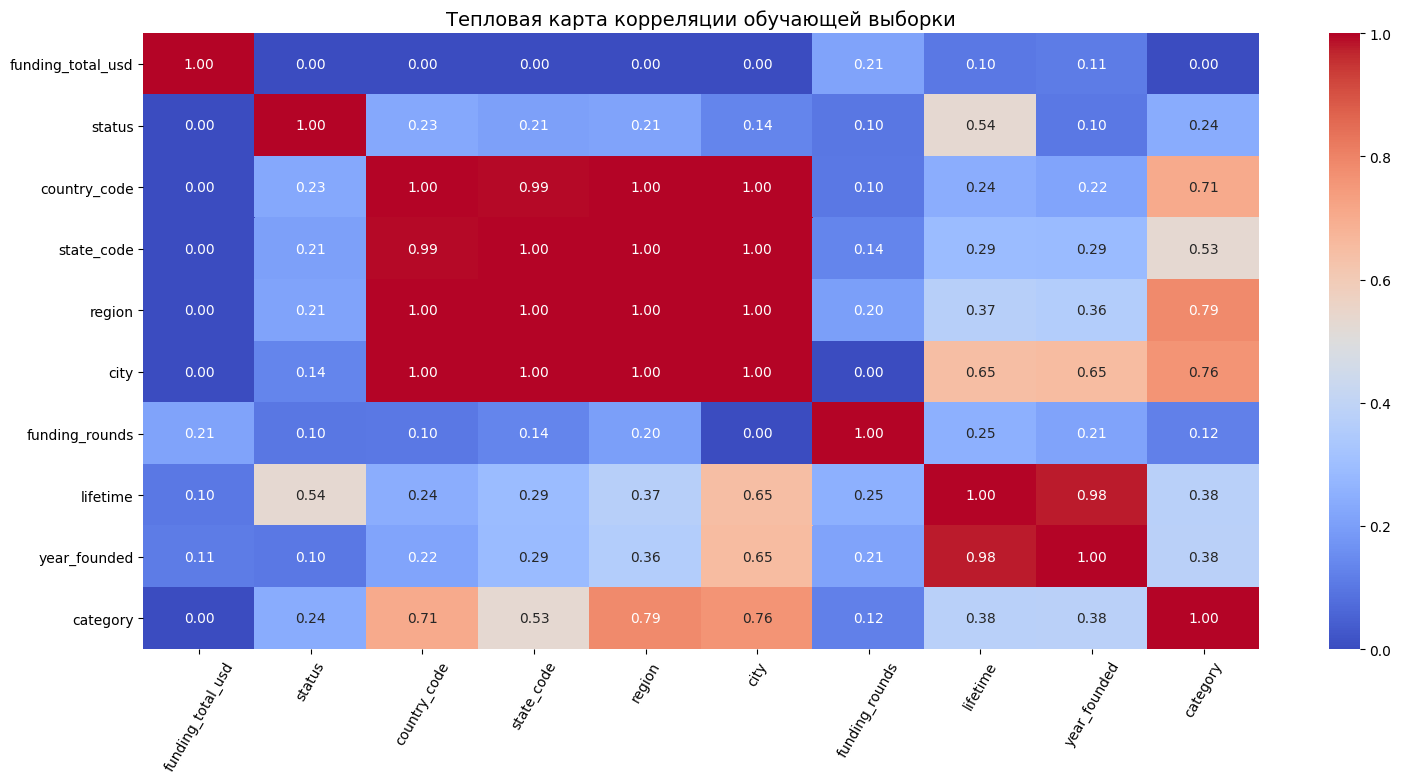

In [51]:
sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df_train_f.phik_matrix(interval_cols=interval_columns), annot=True, cmap='coolwarm',  fmt=".2f") #, mask=matrix2)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
ax.set_title('Тепловая карта корреляции обучающей выборки', fontsize = 14)
plt.show()

Связь между кодом страны, города, региона и городом сужествует и она понятна. Избавимся от мультиколлинеарности - оставим один из этих параметров. 
Статус стартапа незначительно связан с категорией стартапа, между статусом и временем жизни так же есть связь.
Между категорией стартапа и кодом страны, кодом шатат, регионом и городом выявлена корреляция.

Рассчитаем коэффициент корреяции Фи для тестовых данных.

In [49]:
df_test_f = df_test_new[['funding_total_usd', 'country_code', 
                             'state_code', 'region', 'city', 'funding_rounds', 'lifetime', 'category']]
df_test_f.phik_matrix(interval_cols=interval_columns)

The number of unique values of variable city is large: 2118. Are you sure this is not an interval variable? Analysis for pairs of variables including city can be slow.


,funding_total_usd,country_code,state_code,region,city,funding_rounds,lifetime,category
funding_total_usd,1.000000,0.000000,0.000000,0.000000,0.000000,0.301982,0.245198,0.000000
country_code,0.000000,1.000000,0.993492,0.999933,0.999929,0.000000,0.170850,0.631810
state_code,0.000000,0.993492,1.000000,0.999896,0.999983,0.000000,0.340808,0.538744
region,0.000000,0.999933,0.999896,1.000000,1.000000,0.000000,0.476573,0.643335
city,0.000000,0.999929,0.999983,1.000000,1.000000,0.000000,0.758640,0.000000
funding_rounds,0.301982,0.000000,0.000000,0.000000,0.000000,1.000000,0.250941,0.319222
lifetime,0.245198,0.170850,0.340808,0.476573,0.758640,0.250941,1.000000,0.283618
category,0.000000,0.631810,0.538744,0.643335,0.000000,0.319222,0.283618,1.000000


The number of unique values of variable city is large: 2118. Are you sure this is not an interval variable? Analysis for pairs of variables including city can be slow.


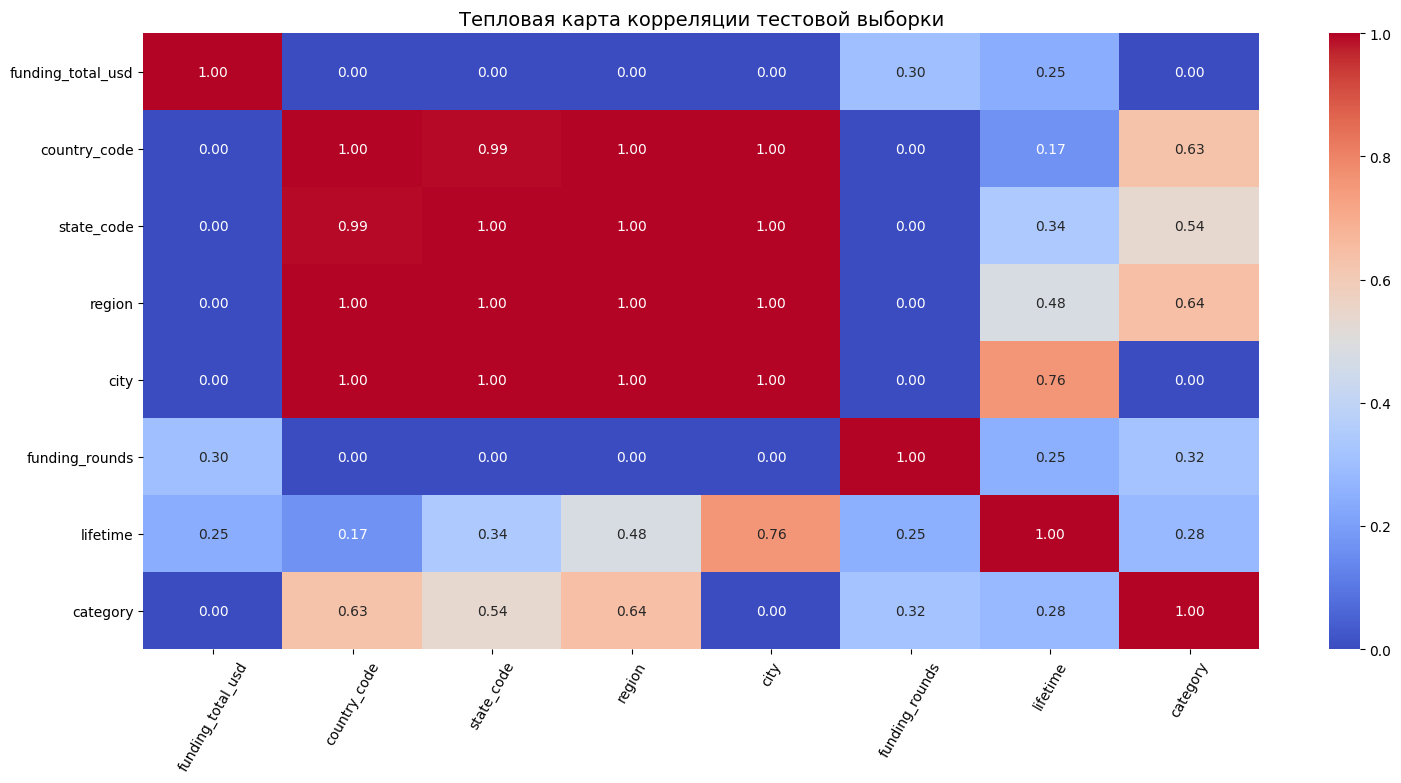

In [52]:
sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df_test_f.phik_matrix(interval_cols=interval_columns), annot=True, cmap='coolwarm',  fmt=".2f") #, mask=matrix2)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
ax.set_title('Тепловая карта корреляции тестовой выборки', fontsize = 14)
plt.show()

В отличии от тренировочных данных в тестовых нет связи между городом и категорией стартапа. 

**Вывод** 
Выполнена предобработка данных. Явные дубликаты не обнаружены. Выполнено заполнение пропусков значение unkn, или нулями. Выявлена мультиколлинеарность между признаками.

## Исследовательский анализ данных

Посмотрим на распределение признаков.

Изучим финансирование проектов - funding_total_usd

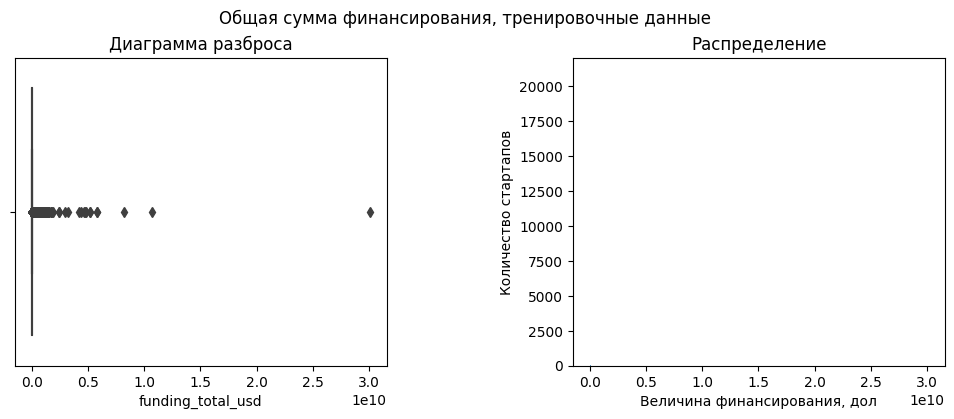

In [73]:
 #Построим графики для тренировочной выборки выборки
fig, axes = plt.subplots(1, 2, figsize=(12,4));
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.suptitle('Общая сумма финансирования, тренировочные данные', y=1.0)
sns.boxplot(data=df_train_new, x='funding_total_usd', ax=axes[0]).set (title='Диаграмма разброса');
plt.xlabel('Величина финансирования, дол');
sns.histplot(data=df_train_new, x='funding_total_usd', ax=axes[1]).set (title='Распределение');
plt.xlabel('Величина финансирования, дол');
plt.ylabel('Количество стартапов');
plt.show();

In [72]:
#Выявлено большое количество выбросов, посмотрим на данные в колонке в диапазоне до 5le9
df_train_new.query('funding_total_usd < 5000000000')['funding_total_usd'].describe()

count    5.250800e+04
mean     1.340113e+07
std      7.358267e+07
min      0.000000e+00
25%      4.000000e+04
50%      1.000000e+06
75%      6.770597e+06
max      4.812000e+09
Name: funding_total_usd, dtype: float64

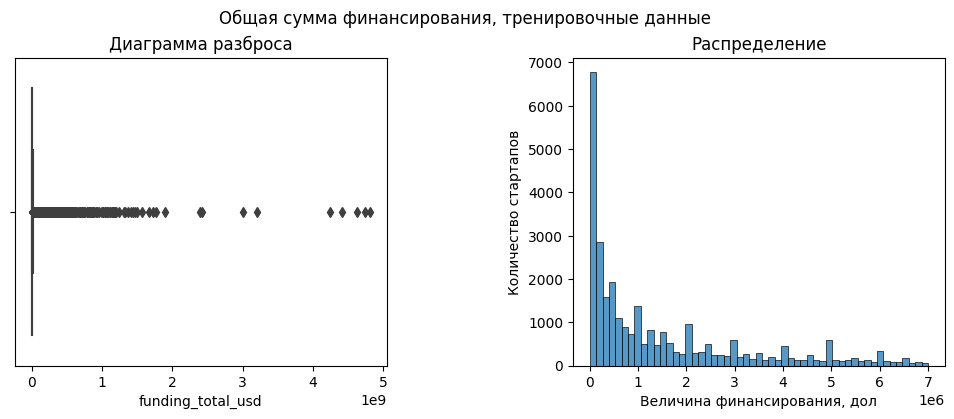

In [75]:
 #Построим графики с усами для тренировочной выборки выберем значения меньше 7 млн$
fig, axes = plt.subplots(1, 2, figsize=(12,4));
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.suptitle('Общая сумма финансирования, тренировочные данные', y=1.0)
sns.boxplot(data=df_train_new.query('funding_total_usd < 5000000000'), x='funding_total_usd', ax=axes[0]).set (title='Диаграмма разброса');
plt.xlabel('Величина финансирования, дол');
sns.histplot(data=df_train_new.query('0 < funding_total_usd < 7000000'), x='funding_total_usd', ax=axes[1]).set (title='Распределение');
plt.xlabel('Величина финансирования, дол');
plt.ylabel('Количество стартапов');
plt.show();

Очевидно, что замена суммы финансирования на ноль сильно повлияла на результат.


Исходя из данных на графике, а так же исходя из информации из пункта 2.1.: 
   
   1. 10 тысяч проектов не получили финансирование вообще.
   2. 7 тысяч проектов получили финансирование около 150000 рублей.
   3. всего получили финансирование от 150 тыс до 30 млрд долларов.
   4. чаще финансирование было кратным 1 млн долларов.

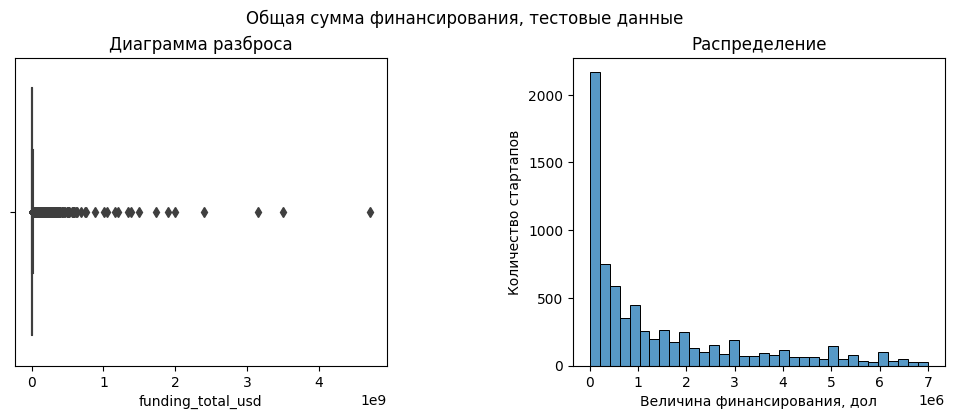

In [77]:
#Построим графики с усами для тестовой выборки выберем значения меньше 7 млн$
fig, axes = plt.subplots(1, 2, figsize=(12,4));
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.suptitle('Общая сумма финансирования, тестовые данные', y=1.0)
sns.boxplot(data=df_test_new.query('funding_total_usd < 5000000000'), x='funding_total_usd', ax=axes[0]).set (title='Диаграмма разброса');
plt.xlabel('Величина финансирования, дол');
sns.histplot(data=df_test_new.query('0 < funding_total_usd < 7000000'), x='funding_total_usd', ax=axes[1]).set (title='Распределение');
plt.xlabel('Величина финансирования, дол');
plt.ylabel('Количество стартапов');
plt.show();

Картина аналогична обучающей выборке.

In [78]:
df_train_new['funding_total_usd'].sum()

774550786458.5469

Оценим число стартапов-единорогов

In [82]:
df_train_new.query('funding_total_usd >1000000000').value_counts().sum()

48

Оценим распределение этапов(раундов) финансирования обучающей и тестовой выборки

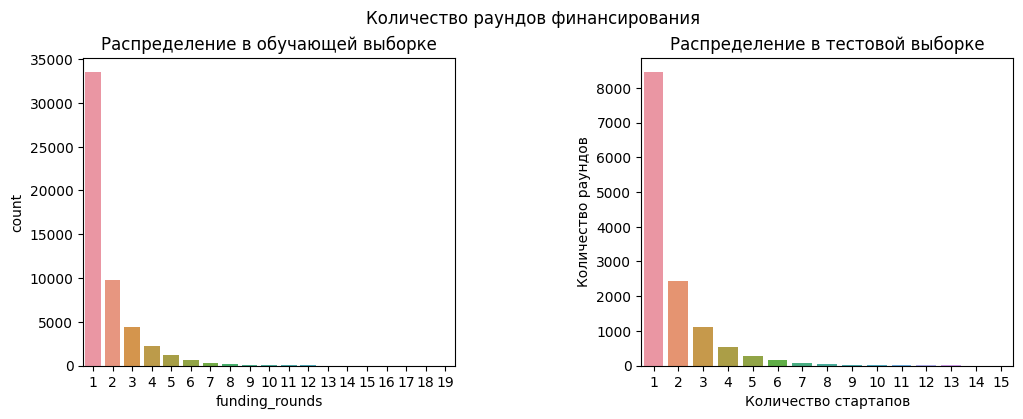

In [85]:
#Построим графики распределения 
fig, axes = plt.subplots(1, 2, figsize=(12,4));
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.suptitle('Количество раундов финансирования', y=1.0)
#sns.boxplot(data=df_test_new.query('funding_total_usd < 5000000000'), x='funding_total_usd', ax=axes[0]).set (title='Диаграмма разброса');
sns.countplot(data=df_train_new, x='funding_rounds', ax=axes[0]).set (title='Распределение в обучающей выборке');
sns.countplot(data=df_test_new, x='funding_rounds', ax=axes[1]).set (title='Распределение в тестовой выборке');
#sns.histplot(data=df_test_new.query('0 < funding_total_usd < 7000000'), x='funding_total_usd', ax=axes[1]).set (title='Распределение');
plt.xlabel('Количество стартапов');
plt.ylabel('Количество раундов');
plt.show();

Чаще встречается один этап финансирования

Оценим взаимосвязи статуса стартапа с другими признаками.

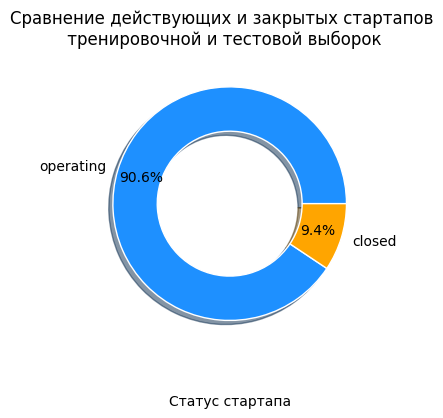

In [101]:
fig, ax = plt.subplots()
offset=0.3
v_palette =  {"dodgerblue",  "green", "pink", "red", "orange"}
fig.suptitle('Сравнение действующих и закрытых стартапов\n тренировочной и тестовой выборок', y=0.9)
labels = df_train_new['status'].value_counts().keys().tolist()
#labels1 = df_test_new['status'].value_counts().keys().tolist()
cmap = plt.get_cmap("tab10")
b_colors = cmap(np.array([0, 8, 12]))
sm_colors = cmap(np.array([1, 2, 3, 9, 10, 11, 13, 14, 15]))
ax.pie(df_train_new['status'].value_counts(), radius=0.79, colors=v_palette,\
                       wedgeprops=dict(width=offset, edgecolor='w'), labels = labels,\
                       autopct='%1.1f%%', pctdistance = 0.79, shadow=True)
#ax.pie(df_test_new['status'].value_counts(), radius=0.9-offset, colors=sm_colors,\
#                       wedgeprops=dict(width=offset, edgecolor='w'), labels = labels1, autopct='%1.1f%%',\
#                       pctdistance = 0.75, shadow=True )
plt.xlabel('Статус стартапа');
plt.show();

Выявлен дисбаланс классов - доля закрытых стартапов не превышает 10%. Это может повлечь проблемы в обучении модели.

In [102]:
df_train_new


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime,year_founded,category
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,2998,2009,Online Reservations
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,4748,2005,Manufacturing
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,4383,2006,Biotechnology
3,Sancilio and Company,Health Care,22250000.0,operating,unkn,unkn,unkn,unkn,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,5114,2004,Health Care
4,WireTough Cylinders,Manufacturing,0.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,2791,2010,Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,0.0,operating,CAN,ON,Toronto,Kitchener,1,2012-01-01,2014-03-01,2014-03-01,2018-01-01,2192,2012,Entertainment
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2013-08-25,2014-03-07,2014-03-07,2018-01-01,1590,2013,Hospitality
52513,Taskforce,Email|Messaging|Productivity Software,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2010-07-01,2009-06-14,2011-01-01,2018-01-01,2741,2010,Email
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1997-12-01,1998-11-30,2004-03-01,2018-01-01,7336,1997,Security


In [110]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [123]:
test = df_train_new["country_code"].str[:2]


In [124]:
test

0        CH
1        US
2        US
3        un
4        US
         ..
52511    CA
52512    IN
52513    US
52514    US
52515    ES
Name: country_code, Length: 52515, dtype: object

In [125]:
# добавим колонку с частью света в тренировочную выборку
test1= 'RU'
test =pc.country_alpha2_to_continent_code(test)
test
#df_train_new['continent'] = pc.country_alpha2_to_continent_code(data_train['country_code'])
#df_train_new['continent'].value_counts()

KeyError: "Invalid Country Alpha-2 code: '0        CH\n1        US\n2        US\n3        un\n4        US\n         ..\n52511    CA\n52512    IN\n52513    US\n52514    US\n52515    ES\nName: country_code, Length: 52515, dtype: object'"

In [127]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

#country_name = list(df['country'])
#country_to_continent(country_name) 

In [131]:
print(test.apply(lambda x: country_to_continent(x)))

TypeError: argument of type 'functools._lru_cache_wrapper' is not iterable

In [130]:
test


0        CH
1        US
2        US
3        un
4        US
         ..
52511    CA
52512    IN
52513    US
52514    US
52515    ES
Name: country_code, Length: 52515, dtype: object

In [ ]:
#continent_name = pc.country_alpha2_to_continent_code(country_code)
#print(continent_name)